In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.beta_0 = 0
        self.beta_1 = 0

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        X, y = np.array(X).flatten(), np.array(y).flatten()
        n = len(X)

        for _ in range(self.iterations):
            linear_model = self.beta_0 + self.beta_1 * X
            y_pred = self.sigmoid(linear_model)
            gradient_beta_0 = (-1 / n) * np.sum(y - y_pred)
            gradient_beta_1 = (-1 / n) * np.sum(X * (y - y_pred))
            self.beta_0 -= self.learning_rate * gradient_beta_0
            self.beta_1 -= self.learning_rate * gradient_beta_1

    def predict_proba(self, X):
        X = np.array(X).flatten()
        linear_model = self.beta_0 + self.beta_1 * X
        return self.sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        proba = self.predict_proba(X)
        return (proba >= threshold).astype(int)

    def accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)





In [1]:
def train_test_split(X, y, test_size=0.2):
    data_size = len(X)
    test_size = int(data_size * test_size)
    indices = np.random.permutation(data_size)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    return X_train, X_test, y_train, y_test

Logistic Regression Model:
Intercept (beta_0): 6824.721657896562
Slope (beta_1): 26935.141219179037
Accuracy on training data: 0.0
Accuracy on test data: 0.0


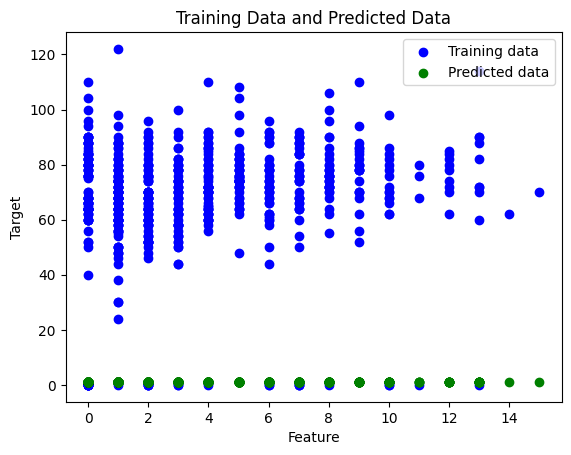

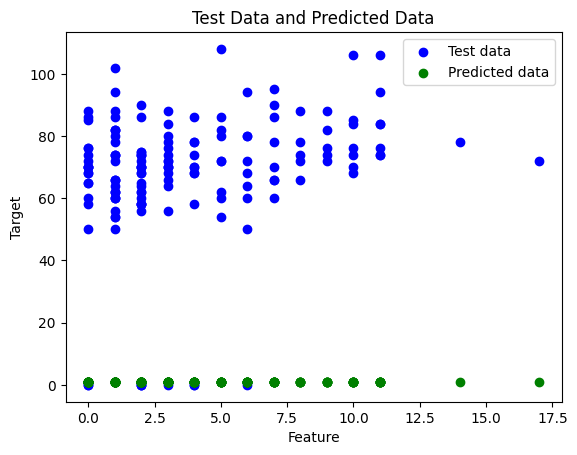

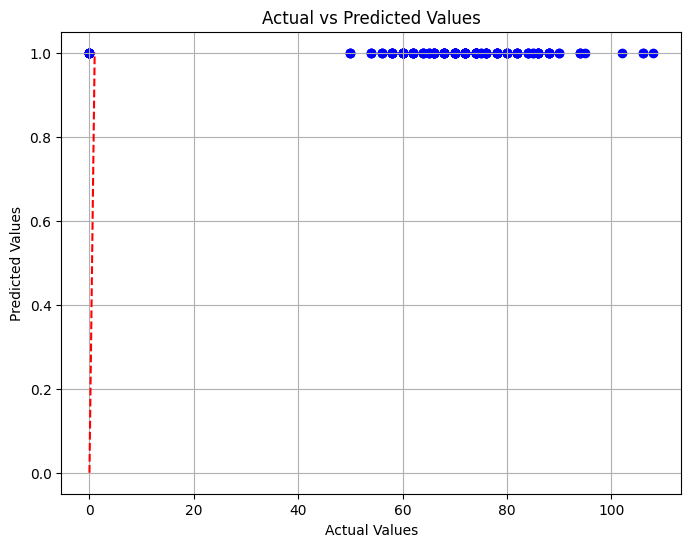

In [16]:
if __name__ == "__main__":
    # Load dataset
    df = pd.read_csv('/content/sample_data/diabetes.csv')
    df.head(10)
    X = df['Pregnancies'].values
    y = df['BloodPressure'].values

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Train the model using Gradient Descent
    model = LogisticRegressionGD(learning_rate=0.01, iterations=10000)
    model.fit(X_train, y_train)

    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Performance metrics
    print("Logistic Regression Model:")
    print(f"Intercept (beta_0): {model.beta_0}")
    print(f"Slope (beta_1): {model.beta_1}")
    print("Accuracy on training data:", model.accuracy(y_train, y_pred_train))
    print("Accuracy on test data:", model.accuracy(y_test, y_pred_test))

    # Plotting the decision boundary
    plt.scatter(X_train, y_train, color='blue', label='Training data')
    plt.scatter(X_train, y_pred_train, color='green', label='Predicted data')
    plt.title('Training Data and Predicted Data')
    plt.xlabel('Feature')
    plt.ylabel('Target')
    plt.legend()
    plt.show()

    plt.scatter(X_test, y_test, color='blue', label='Test data')
    plt.scatter(X_test, y_pred_test, color='green', label='Predicted data')
    plt.title('Test Data and Predicted Data')
    plt.xlabel('Feature')
    plt.ylabel('Target')
    plt.legend()
    plt.show()

    # Plotting Actual vs Predicted Values for Test Data
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred_test, color='blue')
    plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # Diagonal line
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.grid(True)
    plt.show()
